In [78]:
from scipy import interpolate

import numpy as np
import pandas as pd

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.constants import c as lightspeed

from eniric import broaden
from funcs.xcorr import correlate_maxlag, get_lags

import time
import os



def script_1_plot_spectra(carms, salt, wavmin, wavmax, tstamp):
    # Plot the model spectra together with the SALT spectra

    plt.figure(figsize=(12,15))

    off = 0

    for key, l in carms.items():
        sp = l[4]
        wav = sp.loc[(sp.lambd>wavmin) & (sp.lambd<wavmax),"lambd"].values
        mflux = sp.loc[(sp.lambd>wavmin) & (sp.lambd<wavmax),"flux"].values
        plt.plot(wav,mflux/np.median(mflux)+off , linewidth=1, label=f"{key} ({l[0]})")
        off +=2.75

    for l,spc in salt.items():

        sp, c = spc

        wav = sp.loc[(sp.lambd>wavmin) & (sp.lambd<wavmax),"lambd"].values
        mflux = sp.loc[(sp.lambd>wavmin) & (sp.lambd<wavmax),"flux"].values
        plt.plot(wav,mflux/np.median(mflux) + off , linewidth=1, label=f"{l}", c=c)
        off +=2.75



    plt.xlim(wavmin, wavmax)
    #plt.ylim(-100,1e5)
    #plt.ylim(0,4.6)
    plt.legend(fontsize=15,loc=(1.05,.7))
    plt.xlabel(r"$\lambda\;[\AA]$", fontsize=13)
    plt.ylabel(r"norm. flux", fontsize=13)
    plt.ylim(-1,23)
    plt.tight_layout()
    #plt.savefig(f"../plots/vsini/{tstamp}_salt3_{wavmin:.0f}_{wavmax:.0f}.png", dpi=300);
    

In [81]:
# Time stamp
tstamp = time.strftime("%d_%m_%Y", time.localtime())

# Current working directory
CWD = "/".join(os.getcwd().split("/")[:-2])

# Define paper directory:
CPD = "/home/ekaterina/Documents/002_writing/multiperiod-flares-draft"

# Define in- and output paths
valdir = f'{CPD}/values/'
figdir = f'{CPD}/figures/'
dirr = f'{CWD}/data'

# GET ALL THE SPECTRA:

# SALT1 and SALT2
# ------------------------------------------------------------------------

sp1 = pd.read_csv(f"{dirr}/salt/R202002080014.1.ffc.hwl.txt", 
                  delimiter="\s+", names=["lambd", "flux", "flux_err"])
# mask an emission line that is only seen in SALT but not in CARMENES
sp1.loc[((sp1["lambd"] > 7949.2) & (sp1["lambd"] < 7949.8)), "flux"] = np.nan
sp1 = sp1.dropna(how="any")


salt = {"TIC 300741820": [sp1, "r"]}    

# Get non-rotating spectra from CARMENES
# ------------------------------------------------------------------------


# Spectral types come from the CARMENES data base on Vizier
carms = {
       #  "GJ 1223": 
       #  ["M5", "carmenes_gj1223_m5_vis_less2kms.fits", 0, "gj1223"],
        
         
         "Ross 1003": 
         ["M4", "carmenes_ross1003_m4_vis_less2kms.fits", .0, "ross1003"],
          "GJ 1235": 
         ["M4.5", "carmenes_gj1235_m45_vis_less2kms.fits", .0, "gj1235"],
        "Wolf 1069": 
         ["M5", "carmenes_wolf_m5_vis_less2kms.fits", 0., "wolf1069"],
        "GJ 1002": 
         ["M5.5", "carmenes_gj1002_m55_vis_less2kms.fits", 0., "gj1002"],
         "CN Leo": 
         ["M6", "carmenes_cnleo_vis.fits", 3.05, "cnleo"],
         "LP 731-058": 
         ["M6.5", "carmenes_lp731_m65_vis.fits", 1.05, "lp731"],
       # "LSRJ0539+4038": 
       #  ["M8", "carmenes_lsrj_m8_vis_4kms.fits", .0, "lsrj"],
       #  "Teegarden's Star": 
        # ["M7", "carmenes_teegarden_vis.fits", 3.45, "teega"],
         }

for s, l in carms.items():
    hdu = fits.open(f"{dirr}/carmenes/{l[1]}")
    lambd = hdu[4].data.flatten().byteswap().newbyteorder() - l[2]
    flux = hdu[1].data.flatten().byteswap().newbyteorder()
    sp4 = pd.DataFrame({"lambd":lambd, "flux":flux}).sort_values(by="lambd", ascending=True)
    sp4 = sp4.dropna(how="any")
    l.append(sp4)


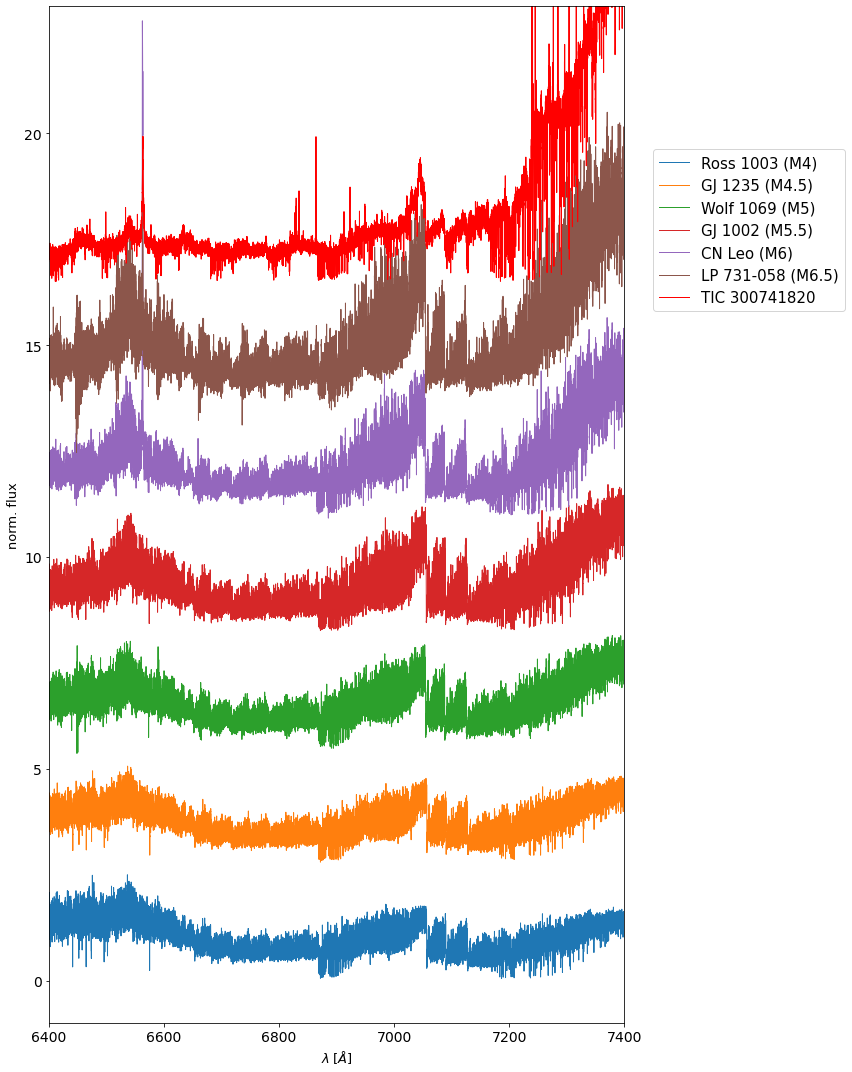

In [82]:
script_1_plot_spectra(carms, salt, 6400, 7400, tstamp)
